### Init

In [1]:
# auto reload
%load_ext autoreload
%autoreload 2

# import
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import random
import os

from data import DataGenerator
from network import VGGNet
from train import train_epoch
from loss import accuracy

### Handle Data

Size of dataset:  2870
Choosing data # 1248
Tumor type:  meningioma


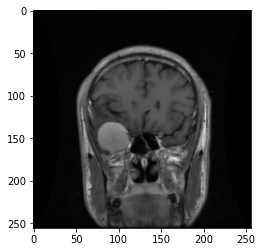

In [2]:
data_train_path = os.path.join(".", "Data", "Training")
data_test_path = os.path.join(".", "Data", "Testing")

data_train_gen = DataGenerator(data_train_path)

n = len(data_train_gen)
print("Size of dataset: ", n)

idx = random.randint(0, n)
print("Choosing data #", idx)

image, label = data_train_gen[idx]
print("Tumor type: ", data_train_gen.tumor_type2name[label])

plt.imshow(data_train_gen._vis_transforms(image))
plt.show()

### Network

In [3]:
net = VGGNet()
print("Network architecture: ", net)
out = net(image.unsqueeze(0))
print("Output size: ", out.shape)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/labs/waic/itaian/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

Network architecture:  VGGNet(
  (model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inpl

### All together

In [10]:
# params
data_train_path = os.path.join(".", "Data", "Training")
batch_size = 100
shuffle_data = True
lr = 0.001

# training setting
device = "cuda" if torch.cuda.is_available() else "cpu"
model = VGGNet().to(device)
criterion = torch.nn.functional.cross_entropy
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loader = torch.utils.data.DataLoader(DataGenerator(data_train_path), 
                                     batch_size=batch_size, shuffle=shuffle_data)

# train
loss, acc = train_epoch(model=model, criterion=criterion, accuracy=accuracy, 
                        optimizer=optimizer, loader=loader, device=device)

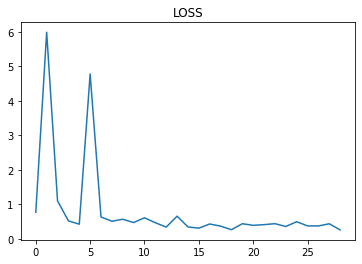

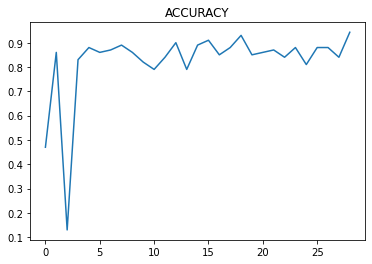

In [15]:
plt.figure()
plt.plot(loss)
plt.title("LOSS")
plt.figure()
plt.plot(acc)
plt.title("ACCURACY")
plt.show()